In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import datasets
from sklearn.mixture import GaussianMixture

In [20]:
# load the iris dataset
iris = datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [22]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [25]:
#iris.data[:, :2]
df.iloc[:, :2]

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


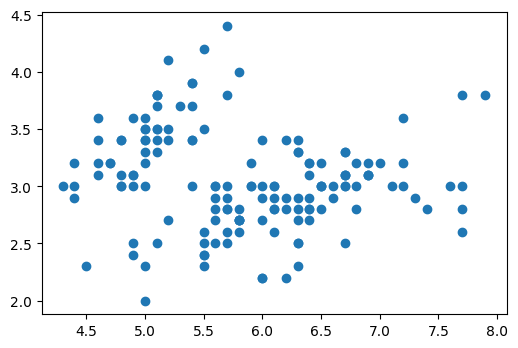

In [26]:
# select first two columns
X = iris.data[:, :2]

# turn it into a dataframe
d = pd.DataFrame(X)

# plot the data
plt.figure(dpi=100)
plt.scatter(d[0], d[1])
plt.show()

In [29]:
gm = GaussianMixture(n_components = 3)
gm.fit(df.iloc[:, :2])

GaussianMixture(n_components=3)

In [45]:
labels = gm.predict(df.iloc[:, :2])
df['label'] = labels
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
55,5.7,2.8,4.5,1.3,0
116,6.5,3.0,5.5,1.8,1
78,6.0,2.9,4.5,1.5,0
103,6.3,2.9,5.6,1.8,0
66,5.6,3.0,4.5,1.5,0


In [46]:
df.label.unique()

array([2, 0, 1], dtype=int64)

In [52]:
d0 = df[df['label'] == 0]
d1 = df[df['label'] == 1]
d2 = df[df['label'] == 2]

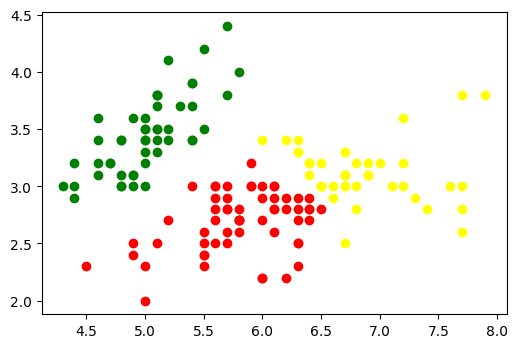

In [61]:
plt.figure(dpi = 100)
# plot three clusters in same plot
plt.scatter(d0['sepal length (cm)'], d0['sepal width (cm)'], c ='r')
plt.scatter(d1['sepal length (cm)'], d1['sepal width (cm)'], c ='yellow')
plt.scatter(d2['sepal length (cm)'], d2['sepal width (cm)'], c ='g')
plt.show()

In [62]:
# print the converged log-likelihood value
print(gm.lower_bound_)

# print the number of iterations needed
# for the log-likelihood value to converge
print(gm.n_iter_)

-1.4987505566235166
8
